<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [194]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
print(hh_data.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [195]:
display(hh_data.head(2))

Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [196]:
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5. Выведите основную статистическую информацию о столбцах.


In [197]:
display(hh_data.describe(include='object'))

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [198]:
#Создадим с помощью функции-преобразования новый признак "Образование", который имеет 4 категории:
# "высшее", "неоконченное высшее", "среднее специальное" и "среднее"
 
def get_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
    
# Создадим новый признак "Образование" и удалим признак "Образовнаие и ВУЗ"
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

#Узнаем количество соискателей, которые имеют средний уровень образования
print(f"Средний уровень образования имеет {hh_data['Образование'].value_counts()['среднее']} соискателей")

Средний уровень образования имеет 559 соискателей


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [199]:
# С функций-преобразования создаем новый признак "Пол", 
# который имеет 2 уникальных значения:'М', 'Ж'
def get_sex(arg):
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'
    
# С функций-преобразования создаем новый признак "Возраст",
# который представлен целыми числами    
def get_age(arg):
    arg_splitted = arg.split(' ') 
    year_words = ['год', 'года', 'лет']
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            return int(arg_splitted[index-1])
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_sex)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)

# Удалим признаки "Пол" и "Возраст" из таблицы
hh_data = hh_data.drop('Пол, возраст', axis=1)

# Найдем процент женских резюме, среди соискателей
print(f"Среди соискателей {round(hh_data['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)} % резюме женщин")

# Узнаем, чему равен средний возраст соискателй
print(f"Средний возраст соискателей {round(hh_data['Возраст'].mean(), 2)} года")



Среди соискателей 19.07 % резюме женщин
Средний возраст соискателей 32.2 года


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [200]:
# Напишем функцию, которая преобразует признак "Опыт работы"
def get_experience(arg):
    # фукция преобразования возвращает None, 
    # в случае пропуска либо значения "Не указано"
    if arg is np.nan or arg == 'Не указано':
        return None
    # составим списки возможных склонений слов
    # "год" и "месяц" 
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)

# Создаем новый признак "Опыт работы (месяц)" и удаляем признак "Опыт работы"
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data = hh_data.drop('Опыт работы', axis=1)

# Найдем мелианный опыт работы в месяцах
print(f"Медианный опыт работы {round(hh_data['Опыт работы (месяц)'].median())} месяцев")      

Медианный опыт работы 100 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [201]:
# Создадим функцию, преобразуеющую признак "Город", 
# который должен содержать только 4 категории: "Москва", "Санкт-Петербург" 
# и "город-миллионник", "другие"
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
# Создадим функцию, которая определяет готовность к переезду, 
# где True означает готовкость к переезду, False - не готовноть
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# Создадим функцию, которая определяет готовность к командировкам, 
# где True означает готовкость к командировкам, False - не готовноть 
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
# Создадим новые признаки "Город", " Готовность к переезду", "Готовность к командировкам"   
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)

# Удалим признак "Город, переезд, командировки"
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

# Выясним, какой процет соискателей живет с Санкт-Петербурге  
print(f"Живет в Санкт-Петербурге {round(hh_data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)} % соискателей") 

# Найдем, процент соискателей, готовы и к переездам, и к командировкам
print(round(hh_data[hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']
].shape[0] / hh_data.shape[0] *100))

Живет в Санкт-Петербурге 11 % соискателей
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [202]:
# с помощью цикла и Лямбда функции создадим признаки - мигалки для каждой категории,
# сожержащейся в признаках "Занятость" и "График"
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employments, charts):
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)
    
# удалим признаки "Занятость" и "График"
hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)

# Найдем количество людей, которые ищут проектную работу и волонтёрство
print(f"Проектную работу и волонтерство ищут {hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0]} человек")
# Найдем количество человек, которе хотят работать вахтовым методом и с гибким графиком
print(f"Хотят работать вахтовым методом и с гибким графиком {hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0]} человек")

Проектную работу и волонтерство ищут 436 человек
Хотят работать вахтовым методом и с гибким графиком 2311 человек


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [203]:
# Напишем функции, которые выделяет число из данных
# и наименование курса валюты, с помощью словаря. 
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    
    # Убираем знаки препинания 
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
# Читаем таблицу с данными об обмене валюты   
rates = pd.read_csv('data/ExchangeRates.csv')

# Переводим признак "Обновление резюме" из таблицы с резюме в формат datetime 
# и достаем из него дату. 
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
# Создаем новый признак "ЗП"
hh_data['ЗП (tmp)'] = hh_data['ЗП'].apply(get_salary_num)
hh_data['Курс (tmp)'] = hh_data['ЗП'].apply(get_salary_currency)

# Присоединяем к таблице с резюме таблицу с курсами 
# по столбцам с датой и названием валюты
merged = hh_data.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
hh_data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
# Удаляем признаки "ЗП", "ЗП (tmp)", "Курс (tmp)"
hh_data = hh_data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)

# Выясним желаемаую медианную заработную плату соискателей
print(f"Желаемая медианная заработная плата соискателей составляет {round(hh_data['ЗП (руб)'].median()/1000)} тыс.руб.")


Желаемая медианная заработная плата соискателей составляет 59 тыс.руб.


# Исследование зависимостей в данных

1. Постройте **"Возраст"** . Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [204]:
# Построим график распределения признака "Возраст"
fig = px.histogram(
    data_frame=hh_data,
    x='Возраст',
    title='Распределение возраста соискателей',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig.show()
fig.write_html("plotly/histogram.html")

Выводы по графику распределения признака **"Возраст"**:

1. Модальное зачение возраста соискателей равно 30 лет.
2. Предельные значения признака **"Возраст"** составляют 14 и 100 лет.
3. Большинство соискателей находится в интервале от 27 до 36 лет.
4. К аномалиям признака **"Возраст"** можно отнести соискателей, которым 14 лет, а также соискателей, старше 65 лет. 

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [205]:
# Построим график распределения признака "Опыт работы (месяц)"
fig = px.histogram(
    data_frame=hh_data,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig.show()
fig.write_html("plotly/histogram.html")

Выводы по графику распределения признака **"Опыт работы (месяц)"**: 
1. Мода распределения равна 80-84 месяца (около 7 лет)
2. Пределльные занчения признака **"Опыт работы (месяц)"** находятся в интервале от 1 до 1188 месяцев, или от 1 месяца до 55 лет. 
3. Опыт работы большинства соискателей от 57 до 154 месяцев, или от 5 до 12 лет.  
4. К аномальным значениям для признака  **"Опыт работы (месяц)"** можно отнести опыт работы более 600 месяцев (или 50 лет), так как соискатели у соискателей, старше 65 лет, максимальный опаты работы не может быть более до 50 лет. 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [206]:
# Построим график распределения признака "ЗП (руб)"
fig = px.histogram(
    data_frame=hh_data,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    histnorm='percent',
    width=10000,
    marginal='box',
)
fig.show()
fig.write_html("plotly/histogram.html")

Выводы по графику распредеоления признака **"ЗП (руб)"**:

1. Предельные значения признака **"ЗП (руб)"** составляют от 1000руб. до 1 миллиона рублей.
2. Заработная плата большинства соискателей находится в интервале от 38тыс.руб. до 95тыс.руб. 
3. К аномалиям можно отнести заработную плату от 400 тыс. до 1 миллиона рублей.  

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [207]:
# Построим диаграмму, которая показывает зависимость **медианной** 
# желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**)

bar_hh_data = hh_data[hh_data['ЗП (руб)']<1e6].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=bar_hh_data,
    x='Образование',
    y='ЗП (руб)',
    title='медианная з/п по уровню образования'
    
)
fig.show()
fig.write_html("plotly/bar.html")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57112\1049907213.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Для уровняя образования соискателей "Высшее", уровень заработной платы является наиболее высоким. 
К наиболее низкому уровню заработной платы, относятся соискатели со средним и среднеспециальным уровнем  образования.  

Признак уровня образования необходим при прогнозирования заработной платы в таких профессиях, как врачи, юристы, инженеры, педагоги. Главным факторами, влияющими на уровнь зарплаты, являются уровень конкуренции в той или иной профессиональной области, опыт работы, необходимые навыки, качество и количество реализованных проектов и достижений у соискателя.  

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [208]:
box_data = hh_data[hh_data['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=hh_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение з/п по городам'
)
fig.show()
fig.write_html("plotly/box.html")

Выводы по диаграмме распределения желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**)

1. Зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей) в категории "Другие".
2. Наиболее высокий уровень медианной зараблотной платы находится в категории  "Москва" (85тыс.руб), наиболее низкий уровень медианной заработной платы в категориях "город миллионик" и "других" (40тыс.руб). 
3. На графике видно, что чем выше медианная заработная плата тем выше размах желаемой заработной платы, однако в категории "Другие" наблюдается выброс в виде жедаемой заработной платы 923,8 тыс.руб. 


 Признак "Город" является одинм из важных факторов пригнозирования заработной платы. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [209]:
bar_hh_data = hh_data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_hh_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()
fig.write_html("plotly/bar.html")

Выводы по графику который показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**:

Готовность к переездам и командировкам соискателей влияет на увеличение уровень заработной. 

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [210]:
pivot = hh_data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='blues',
    title='Медианная з/п по образованию и возрасту'
)
fig.show()
fig.write_html("plotly/imshow.html")

Выводы по графику зависимости **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**):

1. В категории "Высшее " образование желаемая заработная плата увеличивается в болшей степени нежели в других категориях. 
2. К аномальным значениям можно отнести наличие высшего образования в 16 лет и желаему заработную плату 120 тыс.руб. в возрасте 67 лет в категории "Средне специальное" и 90 тыс.руб. в возрасте 77 лет в категории "Высшее" образование. 


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

(7, 24)


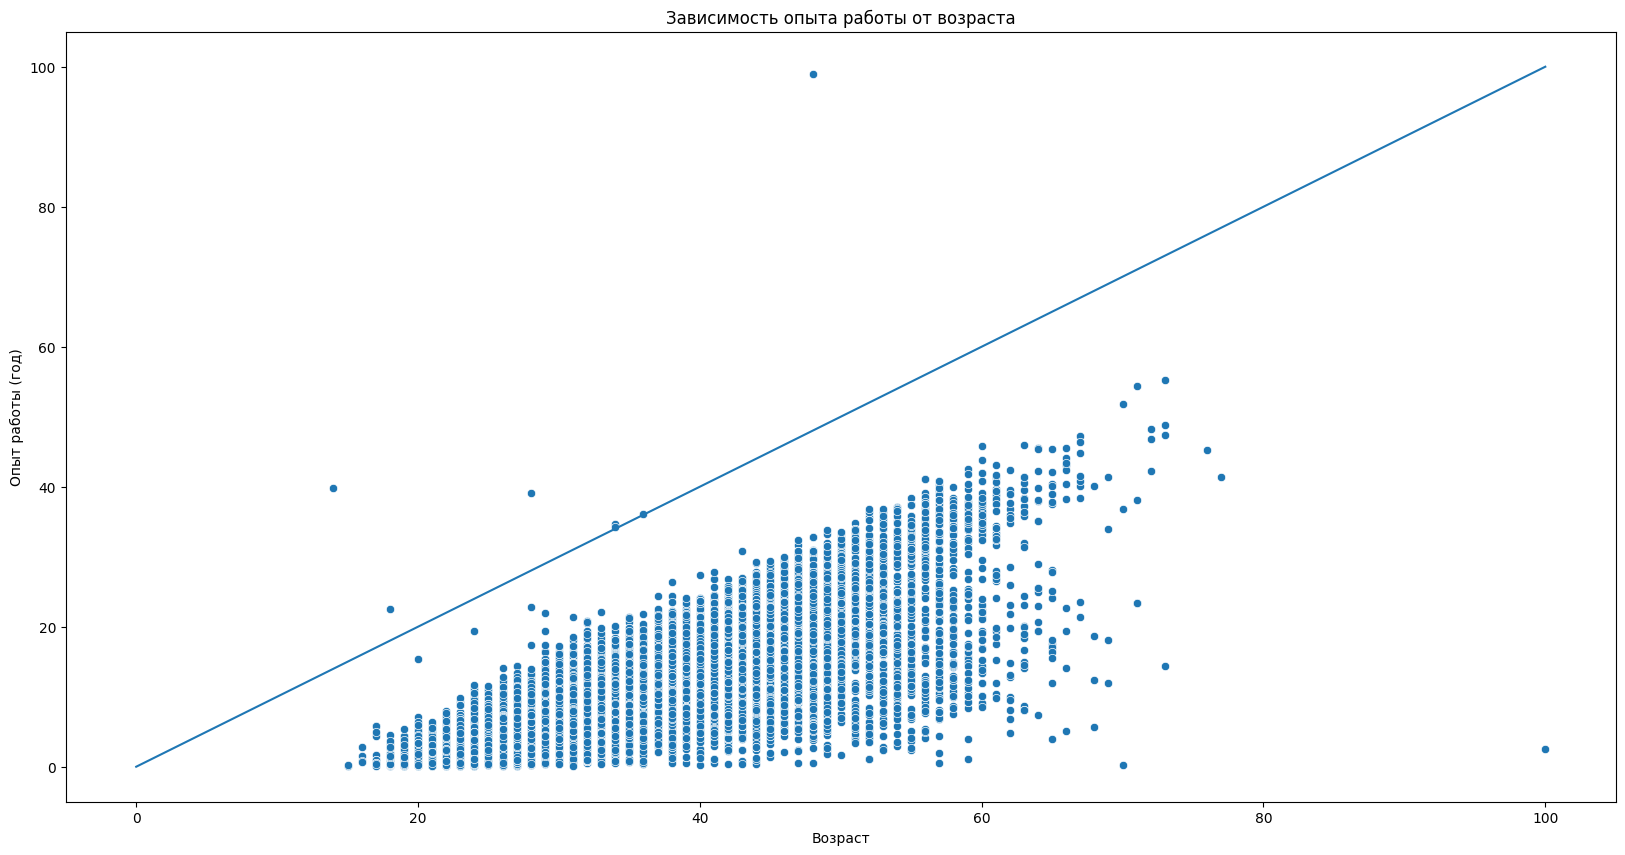

In [211]:
fig = plt.figure(figsize=(20, 10))
scatter_hh_data = hh_data.copy()
scatter_hh_data['Опыт работы (год)'] = scatter_hh_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_hh_data,
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');
print(scatter_hh_data[scatter_hh_data['Опыт работы (год)']>=scatter_hh_data['Возраст']].shape)


Выводы по **диаграмме рассеяния**, показывающей зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**)

1. Наблюдаются аномальные значения, в которых опыт работы соискателей выше чем их возраст, таких соискателей 7. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [212]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [213]:
duplicates = hh_data[hh_data.duplicated(subset=hh_data.columns)]
hh_data = hh_data.drop_duplicates()
print(duplicates.shape[0])

161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [214]:
null_data = hh_data.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [215]:
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(hh_data['Опыт работы (месяц)'].median())
print(round(hh_data['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [216]:
outliers = hh_data[(hh_data['ЗП (руб)'] > 1e6) | (hh_data['ЗП (руб)'] < 1e3)]
hh_data = hh_data.drop(outliers.index)
print(outliers.shape[0])

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [217]:
outliers = hh_data[hh_data['Опыт работы (месяц)']/12 >= hh_data['Возраст']]
hh_data = hh_data.drop(outliers.index)
print(outliers.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонений составляет: 3


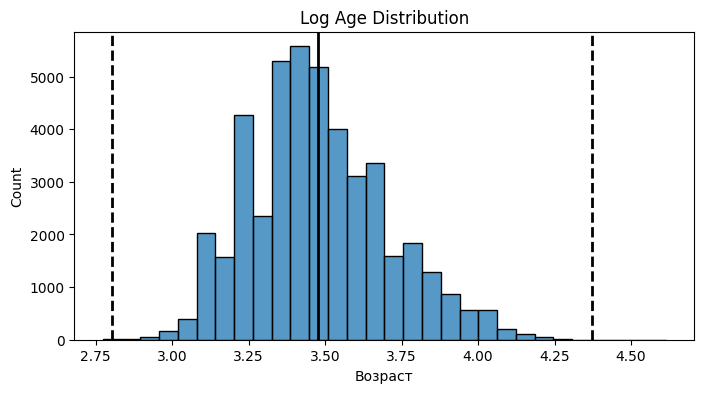

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution');

def outliers_z_score_mod(hh_data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(hh_data[feature]+1)
    else:
        x = hh_data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = hh_data[(x < lower_bound) | (x > upper_bound)]
    cleaned = hh_data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, hh_data = outliers_z_score_mod(hh_data, 'Возраст', left=3,  right=4, log_scale=True)
print(f"Число выбросов по методу z-отклонений составляет: {outliers.shape[0]}")

Логарифмическое распределение ассиметрично в лево 